In [13]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["exp2-granularity-3.30-cpumanager.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance
0,hpccstream,9,16,3,16,2022-03-30T09:43:09Z,2022-03-30T09:43:24Z,2022-03-30T09:46:42Z,2022-03-30T09:46:44Z,4m24.571675529s,4.818130
1,hpccfft,5,16,4,4,2022-03-30T09:44:09Z,2022-03-30T09:44:17Z,2022-03-30T09:51:12Z,2022-03-30T09:51:12Z,7m47.191147918s,0.589795
2,hpccfft,7,16,4,4,2022-03-30T09:44:09Z,2022-03-30T09:44:16Z,2022-03-30T09:51:11Z,2022-03-30T09:51:11Z,7m37.583635491s,0.574648
3,hpccptrans,5,16,3,3,2022-03-30T09:45:09Z,2022-03-30T09:45:18Z,2022-03-30T09:55:16Z,2022-03-30T09:55:16Z,10m47.529770108s,0.077620
4,hpccptrans,1,16,3,3,2022-03-30T09:45:09Z,2022-03-30T09:45:25Z,2022-03-30T09:55:12Z,2022-03-30T09:55:12Z,10m47.575309766s,0.088040
...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-30T09:52:25Z,2022-03-30T10:25:56Z,2022-03-30T10:32:56Z,2022-03-30T10:32:56Z,41m11.329713263s,0.389517
66,hpccptrans,9,16,4,4,2022-03-30T09:54:26Z,2022-03-30T10:31:36Z,2022-03-30T10:40:43Z,2022-03-30T10:40:44Z,47m0.15623393s,0.116945
67,hpccfft,9,16,3,3,2022-03-30T09:55:27Z,2022-03-30T10:30:45Z,2022-03-30T10:38:34Z,2022-03-30T10:38:35Z,43m50.194556893s,0.336676
68,hpccrandomaccess,0,16,4,4,2022-03-30T09:57:30Z,2022-03-30T10:31:34Z,2022-03-30T10:41:04Z,2022-03-30T10:41:04Z,44m19.155537184s,0.027281


In [14]:
print (df.dtypes)

benchmark       object
times            int64
nTasks           int64
nNodes           int64
nWorkers         int64
Pending         object
Running         object
Completing      object
Completed       object
duration        object
performance    float64
dtype: object


In [15]:
from datetime import datetime
df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
df['duration'] = pd.to_timedelta(df['duration'])

In [16]:
df['init'] = df['Running'] - df['Pending']
df['run'] = df['Completing'] - df['Running']
df['final'] = df['Completed'] - df['Completing']
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final
0,hpccstream,9,16,3,16,2022-03-30 09:43:09+00:00,2022-03-30 09:43:24+00:00,2022-03-30 09:46:42+00:00,2022-03-30 09:46:44+00:00,0 days 00:04:24.571675529,4.818130,0 days 00:00:15,0 days 00:03:18,0 days 00:00:02
1,hpccfft,5,16,4,4,2022-03-30 09:44:09+00:00,2022-03-30 09:44:17+00:00,2022-03-30 09:51:12+00:00,2022-03-30 09:51:12+00:00,0 days 00:07:47.191147918,0.589795,0 days 00:00:08,0 days 00:06:55,0 days 00:00:00
2,hpccfft,7,16,4,4,2022-03-30 09:44:09+00:00,2022-03-30 09:44:16+00:00,2022-03-30 09:51:11+00:00,2022-03-30 09:51:11+00:00,0 days 00:07:37.583635491,0.574648,0 days 00:00:07,0 days 00:06:55,0 days 00:00:00
3,hpccptrans,5,16,3,3,2022-03-30 09:45:09+00:00,2022-03-30 09:45:18+00:00,2022-03-30 09:55:16+00:00,2022-03-30 09:55:16+00:00,0 days 00:10:47.529770108,0.077620,0 days 00:00:09,0 days 00:09:58,0 days 00:00:00
4,hpccptrans,1,16,3,3,2022-03-30 09:45:09+00:00,2022-03-30 09:45:25+00:00,2022-03-30 09:55:12+00:00,2022-03-30 09:55:12+00:00,0 days 00:10:47.575309766,0.088040,0 days 00:00:16,0 days 00:09:47,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-30 09:52:25+00:00,2022-03-30 10:25:56+00:00,2022-03-30 10:32:56+00:00,2022-03-30 10:32:56+00:00,0 days 00:41:11.329713263,0.389517,0 days 00:33:31,0 days 00:07:00,0 days 00:00:00
66,hpccptrans,9,16,4,4,2022-03-30 09:54:26+00:00,2022-03-30 10:31:36+00:00,2022-03-30 10:40:43+00:00,2022-03-30 10:40:44+00:00,0 days 00:47:00.156233930,0.116945,0 days 00:37:10,0 days 00:09:07,0 days 00:00:01
67,hpccfft,9,16,3,3,2022-03-30 09:55:27+00:00,2022-03-30 10:30:45+00:00,2022-03-30 10:38:34+00:00,2022-03-30 10:38:35+00:00,0 days 00:43:50.194556893,0.336676,0 days 00:35:18,0 days 00:07:49,0 days 00:00:01
68,hpccrandomaccess,0,16,4,4,2022-03-30 09:57:30+00:00,2022-03-30 10:31:34+00:00,2022-03-30 10:41:04+00:00,2022-03-30 10:41:04+00:00,0 days 00:44:19.155537184,0.027281,0 days 00:34:04,0 days 00:09:30,0 days 00:00:00


In [17]:
df['start'] = df['Pending'][0]
df['afterstart'] = df['Pending'] - df['start']

In [18]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccstream,9,16,3,16,2022-03-30 09:43:09+00:00,2022-03-30 09:43:24+00:00,2022-03-30 09:46:42+00:00,2022-03-30 09:46:44+00:00,0 days 00:04:24.571675529,4.818130,0 days 00:00:15,0 days 00:03:18,0 days 00:00:02,2022-03-30 09:43:09+00:00,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-30 09:44:09+00:00,2022-03-30 09:44:17+00:00,2022-03-30 09:51:12+00:00,2022-03-30 09:51:12+00:00,0 days 00:07:47.191147918,0.589795,0 days 00:00:08,0 days 00:06:55,0 days 00:00:00,2022-03-30 09:43:09+00:00,0 days 00:01:00
2,hpccfft,7,16,4,4,2022-03-30 09:44:09+00:00,2022-03-30 09:44:16+00:00,2022-03-30 09:51:11+00:00,2022-03-30 09:51:11+00:00,0 days 00:07:37.583635491,0.574648,0 days 00:00:07,0 days 00:06:55,0 days 00:00:00,2022-03-30 09:43:09+00:00,0 days 00:01:00
3,hpccptrans,5,16,3,3,2022-03-30 09:45:09+00:00,2022-03-30 09:45:18+00:00,2022-03-30 09:55:16+00:00,2022-03-30 09:55:16+00:00,0 days 00:10:47.529770108,0.077620,0 days 00:00:09,0 days 00:09:58,0 days 00:00:00,2022-03-30 09:43:09+00:00,0 days 00:02:00
4,hpccptrans,1,16,3,3,2022-03-30 09:45:09+00:00,2022-03-30 09:45:25+00:00,2022-03-30 09:55:12+00:00,2022-03-30 09:55:12+00:00,0 days 00:10:47.575309766,0.088040,0 days 00:00:16,0 days 00:09:47,0 days 00:00:00,2022-03-30 09:43:09+00:00,0 days 00:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-30 09:52:25+00:00,2022-03-30 10:25:56+00:00,2022-03-30 10:32:56+00:00,2022-03-30 10:32:56+00:00,0 days 00:41:11.329713263,0.389517,0 days 00:33:31,0 days 00:07:00,0 days 00:00:00,2022-03-30 09:43:09+00:00,0 days 00:09:16
66,hpccptrans,9,16,4,4,2022-03-30 09:54:26+00:00,2022-03-30 10:31:36+00:00,2022-03-30 10:40:43+00:00,2022-03-30 10:40:44+00:00,0 days 00:47:00.156233930,0.116945,0 days 00:37:10,0 days 00:09:07,0 days 00:00:01,2022-03-30 09:43:09+00:00,0 days 00:11:17
67,hpccfft,9,16,3,3,2022-03-30 09:55:27+00:00,2022-03-30 10:30:45+00:00,2022-03-30 10:38:34+00:00,2022-03-30 10:38:35+00:00,0 days 00:43:50.194556893,0.336676,0 days 00:35:18,0 days 00:07:49,0 days 00:00:01,2022-03-30 09:43:09+00:00,0 days 00:12:18
68,hpccrandomaccess,0,16,4,4,2022-03-30 09:57:30+00:00,2022-03-30 10:31:34+00:00,2022-03-30 10:41:04+00:00,2022-03-30 10:41:04+00:00,0 days 00:44:19.155537184,0.027281,0 days 00:34:04,0 days 00:09:30,0 days 00:00:00,2022-03-30 09:43:09+00:00,0 days 00:14:21


In [19]:
df['benchmark'].unique()

array(['hpccstream', 'hpccfft', 'hpccptrans', 'hpccrandomringbw',
       'hpccrandomringlat', 'hpccdgemm', 'hpccrandomaccess'], dtype=object)

In [20]:
df['nWorkers'].unique()

array([16,  4,  3,  1,  2])

#  performance

In [21]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_performance = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_mean' : mean(x['performance']),
                  'model_time_std' : std(x['performance']),
              })).reset_index()
            df_performance.append(df_senario)

In [22]:
df_performance = pd.concat(df_performance, axis=0)
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std
0,hpccstream,16,3,16,4.649465,0.334352
1,hpccstream,16,2,16,4.961490,0.696352
2,hpccstream,16,1,16,4.247073,0.510496
0,hpccfft,16,4,4,0.722841,0.198962
0,hpccfft,16,1,1,11.256880,2.126546
0,hpccfft,16,2,2,0.484429,0.004311
0,hpccfft,16,3,3,0.363096,0.026421
0,hpccptrans,16,3,3,0.108795,0.027140
0,hpccptrans,16,1,1,6.338105,1.025155
0,hpccptrans,16,2,2,0.103175,0.020059


    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccstream      16       3        16         4.649465        0.334352
1  hpccstream      16       2        16         4.961490        0.696352
2  hpccstream      16       1        16         4.247073        0.510496
  benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0   hpccfft      16       4         4         0.722841        0.198962
0   hpccfft      16       1         1        11.256880        2.126546
0   hpccfft      16       2         2         0.484429        0.004311
0   hpccfft      16       3         3         0.363096        0.026421
    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccptrans      16       3         3         0.108795        0.027140
0  hpccptrans      16       1         1         6.338105        1.025155
0  hpccptrans      16       2         2         0.103175        0.020059
0  hpccptrans      16       4         4         0.116945     

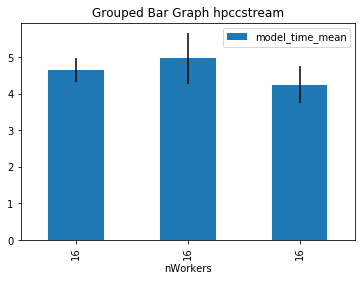

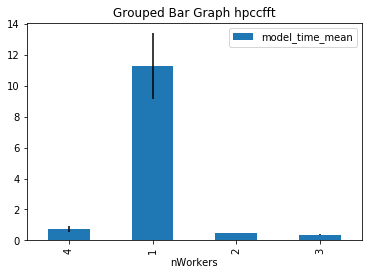

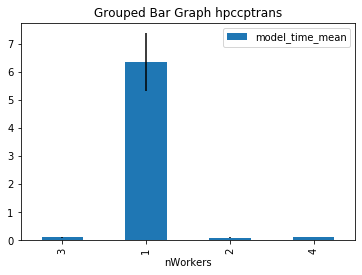

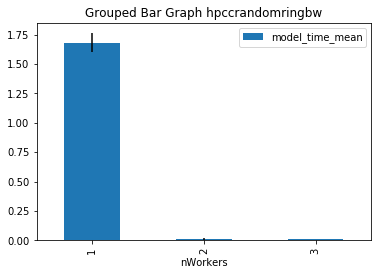

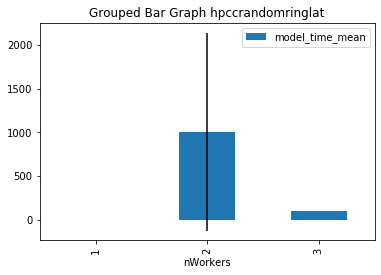

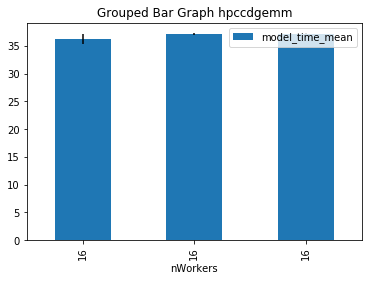

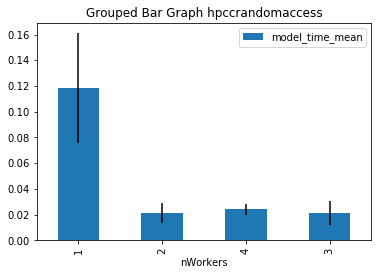

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

#  time slot

In [24]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_mean' : mean(x['init']),
                  'init_std' : std(x['init']),
                'run_mean' : mean(x['run']),
                  'run_std' : std(x['run']),
                'final_mean' : mean(x['final']),
                  'final_std' : std(x['final']),
                'duration_mean' : mean(x['duration']),
                  'duration_std' : std(x['duration']),
              })).reset_index()
            df_time.append(df_senario)

In [25]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std
0,hpccstream,16,3,16,0 days 00:14:49.500000,0 days 00:12:57.209913729,0 days 00:03:04.750000,0 days 00:00:19.536824204,0 days 00:00:01.250000,0 days 00:00:00.829156197,0 days 00:18:43.447743187,0 days 00:12:36.997039654
1,hpccstream,16,2,16,0 days 00:21:54,0 days 00:04:20.922721637,0 days 00:02:53.333333333,0 days 00:00:15.965240019,0 days 00:00:00.666666666,0 days 00:00:00.471404520,0 days 00:25:32.730698581,0 days 00:04:06.817564061
2,hpccstream,16,1,16,0 days 00:24:53.333333333,0 days 00:06:46.530305006,0 days 00:02:59,0 days 00:00:21.416504538,0 days 00:00:01.666666666,0 days 00:00:00.471404520,0 days 00:28:35.020036543,0 days 00:06:37.352806013
0,hpccfft,16,4,4,0 days 00:06:24,0 days 00:08:52.451562742,0 days 00:05:51.666666666,0 days 00:01:29.566858950,0 days 00:00:00,0 days 00:00:00,0 days 00:12:54.304496579,0 days 00:07:21.134837296
0,hpccfft,16,1,1,0 days 00:11:46.666666666,0 days 00:05:23.029754391,0 days 00:01:29,0 days 00:00:00.816496580,0 days 00:00:01.333333333,0 days 00:00:00.471404520,0 days 00:13:52.480696027,0 days 00:05:23.341839700
0,hpccfft,16,2,2,0 days 00:22:13.500000,0 days 00:10:59.500000,0 days 00:06:05,0 days 00:00:02,0 days 00:00:00.500000,0 days 00:00:00.500000,0 days 00:28:54.302884725,0 days 00:10:55.149304473
0,hpccfft,16,3,3,0 days 00:34:24.500000,0 days 00:00:53.500000,0 days 00:07:24.500000,0 days 00:00:24.500000,0 days 00:00:00.500000,0 days 00:00:00.500000,0 days 00:42:30.762135078,0 days 00:01:19.432421815
0,hpccptrans,16,3,3,0 days 00:08:20,0 days 00:10:54.930148947,0 days 00:08:28.750000,0 days 00:01:29.183448576,0 days 00:00:00.250000,0 days 00:00:00.433012701,0 days 00:17:29.350359361,0 days 00:10:18.509478726
0,hpccptrans,16,1,1,0 days 00:14:04.500000,0 days 00:04:57.500000,0 days 00:01:49.500000,0 days 00:00:05.500000,0 days 00:00:00.500000,0 days 00:00:00.500000,0 days 00:16:40.536800461,0 days 00:05:05.227937676
0,hpccptrans,16,2,2,0 days 00:21:37.666666666,0 days 00:09:10.861345732,0 days 00:08:42.333333333,0 days 00:01:34.125212114,0 days 00:00:00.666666666,0 days 00:00:00.942809041,0 days 00:31:00.897196295,0 days 00:10:26.426432370


<ipython-input-26-850cf490fa20>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-850cf490fa20>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



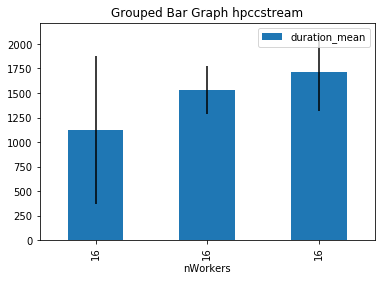

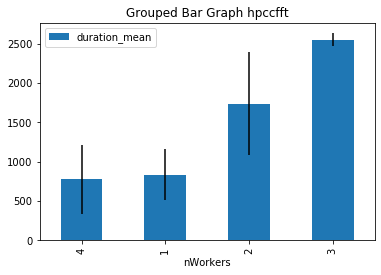

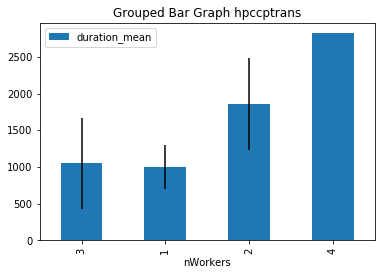

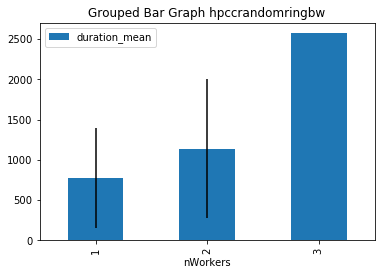

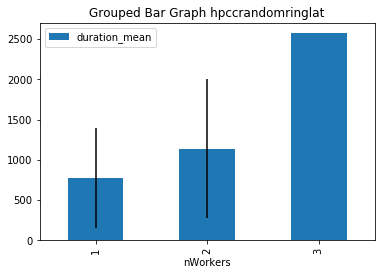

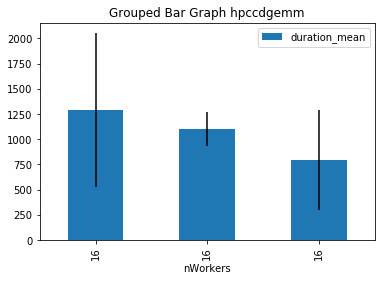

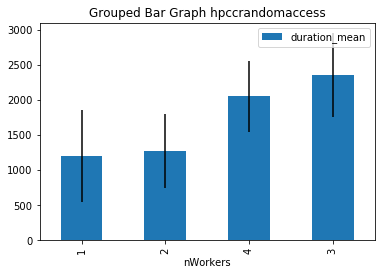

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_mean'] = df_bench['duration_mean'].dt.total_seconds()
    df_bench['duration_std'] = df_bench['duration_std'].dt.total_seconds()

    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='duration_mean',
                  yerr='duration_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

In [27]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nTasks in df_bench.nTasks.unique():
            df_senario = df_bench[df_bench.nTasks == nTasks]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_sum' : sum(x['init'].dt.total_seconds()),
                'run_sum' : sum(x['run'].dt.total_seconds()),
                'final_sum' : sum(x['final'].dt.total_seconds()),
                'duration_sum' : sum(x['duration'].dt.total_seconds()),
              })).reset_index()
            df_time.append(df_senario)

In [28]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum
0,hpccstream,16,11980.0,1796.0,12.0,14237.043178
0,hpccfft,16,10068.0,2941.0,6.0,13390.485617
0,hpccptrans,16,9812.0,4368.0,5.0,14601.322861
0,hpccrandomringbw,16,8803.0,1481.0,3.0,10658.399382
0,hpccrandomringlat,16,8803.0,1481.0,3.0,10658.399382
0,hpccdgemm,16,7816.0,2736.0,6.0,11033.016999
0,hpccrandomaccess,16,13040.0,3665.0,3.0,17104.698152


<ipython-input-29-1521fc477d73>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



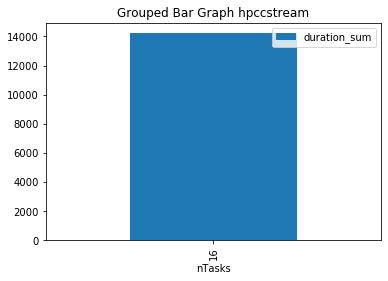

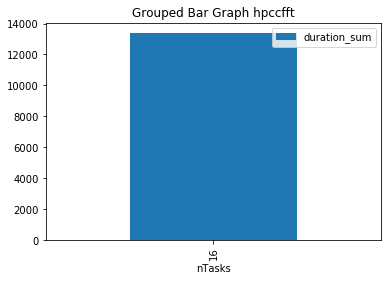

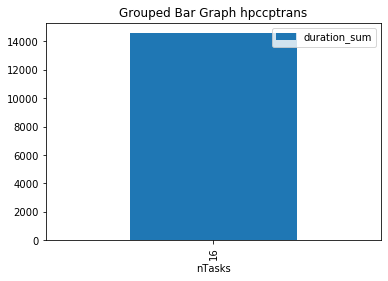

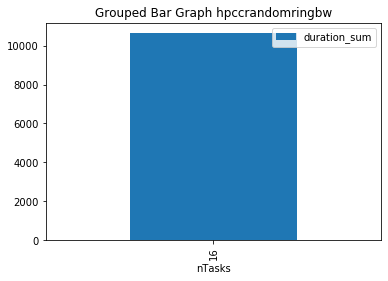

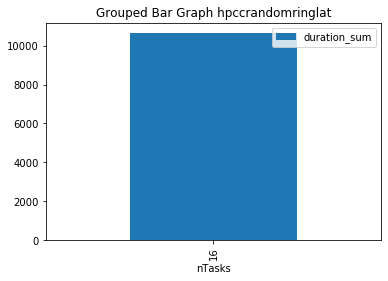

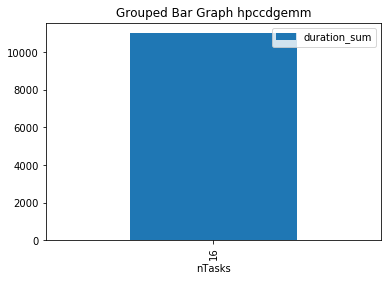

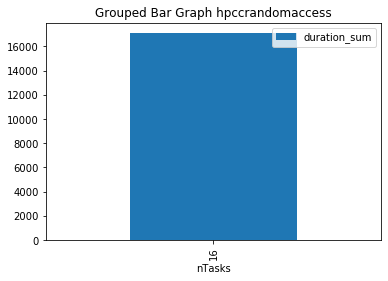

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_sum'] = df_bench['duration_sum']

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_sum',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

# Graph

In [30]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccstream,9,16,3,16,2022-03-30 09:43:09+00:00,2022-03-30 09:43:24+00:00,2022-03-30 09:46:42+00:00,2022-03-30 09:46:44+00:00,0 days 00:04:24.571675529,4.818130,0 days 00:00:15,0 days 00:03:18,0 days 00:00:02,2022-03-30 09:43:09+00:00,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-30 09:44:09+00:00,2022-03-30 09:44:17+00:00,2022-03-30 09:51:12+00:00,2022-03-30 09:51:12+00:00,0 days 00:07:47.191147918,0.589795,0 days 00:00:08,0 days 00:06:55,0 days 00:00:00,2022-03-30 09:43:09+00:00,0 days 00:01:00
2,hpccfft,7,16,4,4,2022-03-30 09:44:09+00:00,2022-03-30 09:44:16+00:00,2022-03-30 09:51:11+00:00,2022-03-30 09:51:11+00:00,0 days 00:07:37.583635491,0.574648,0 days 00:00:07,0 days 00:06:55,0 days 00:00:00,2022-03-30 09:43:09+00:00,0 days 00:01:00
3,hpccptrans,5,16,3,3,2022-03-30 09:45:09+00:00,2022-03-30 09:45:18+00:00,2022-03-30 09:55:16+00:00,2022-03-30 09:55:16+00:00,0 days 00:10:47.529770108,0.077620,0 days 00:00:09,0 days 00:09:58,0 days 00:00:00,2022-03-30 09:43:09+00:00,0 days 00:02:00
4,hpccptrans,1,16,3,3,2022-03-30 09:45:09+00:00,2022-03-30 09:45:25+00:00,2022-03-30 09:55:12+00:00,2022-03-30 09:55:12+00:00,0 days 00:10:47.575309766,0.088040,0 days 00:00:16,0 days 00:09:47,0 days 00:00:00,2022-03-30 09:43:09+00:00,0 days 00:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-30 09:52:25+00:00,2022-03-30 10:25:56+00:00,2022-03-30 10:32:56+00:00,2022-03-30 10:32:56+00:00,0 days 00:41:11.329713263,0.389517,0 days 00:33:31,0 days 00:07:00,0 days 00:00:00,2022-03-30 09:43:09+00:00,0 days 00:09:16
66,hpccptrans,9,16,4,4,2022-03-30 09:54:26+00:00,2022-03-30 10:31:36+00:00,2022-03-30 10:40:43+00:00,2022-03-30 10:40:44+00:00,0 days 00:47:00.156233930,0.116945,0 days 00:37:10,0 days 00:09:07,0 days 00:00:01,2022-03-30 09:43:09+00:00,0 days 00:11:17
67,hpccfft,9,16,3,3,2022-03-30 09:55:27+00:00,2022-03-30 10:30:45+00:00,2022-03-30 10:38:34+00:00,2022-03-30 10:38:35+00:00,0 days 00:43:50.194556893,0.336676,0 days 00:35:18,0 days 00:07:49,0 days 00:00:01,2022-03-30 09:43:09+00:00,0 days 00:12:18
68,hpccrandomaccess,0,16,4,4,2022-03-30 09:57:30+00:00,2022-03-30 10:31:34+00:00,2022-03-30 10:41:04+00:00,2022-03-30 10:41:04+00:00,0 days 00:44:19.155537184,0.027281,0 days 00:34:04,0 days 00:09:30,0 days 00:00:00,2022-03-30 09:43:09+00:00,0 days 00:14:21


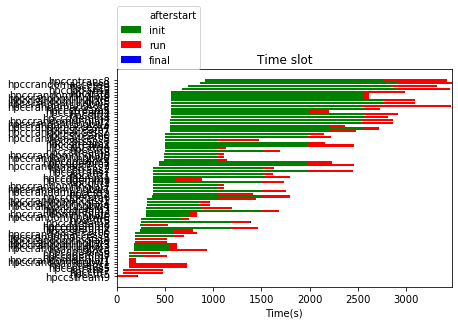

In [31]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 1])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
